In [1]:
%load_ext autoreload

In [2]:
# import external libraries
# and self-defined color map

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import concatenate, merge, Dense, LSTM, Input, Reshape, Convolution2D, Deconvolution2D, Flatten, Dropout, MaxPooling2D, Activation
from keras.activations import relu, softmax, linear
from keras.layers.advanced_activations import PReLU, ELU
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import math
# import cv2
import numpy as np
import csv
from sklearn.utils import shuffle
from pylab import *
from matplotlib import gridspec
cdict = {'red': ((0.0, 1.0, 1.0),
                 (0.125, 1.0, 1.0),
                 (0.25, 1.0, 1.0),
                 (0.5625, 1.0, 1.0),
                 (1.0, 0.0, 0.0)),
         'green': ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5625, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),
         'blue': ((0.0, 0.0, 0.0),
                  (0.5, 0.0, 0.0),
                  (1.0, 0.0, 0.0))}
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

%matplotlib inline
%autoreload 2
#datapath = '/home/microway/Shuo/CarND/CarND-BehaviorCloning-Project/data-given/'


Using TensorFlow backend.


In [3]:
from lib.Function_Smoothing import moving_avg_batch,data_smoothing_moving_avg

In [4]:
import pickle
(Traffic,Speed,data) = pickle.load( open('speed_short_term.p', "rb" ) )
Count = Traffic[:,:,:,1]
Occup = Traffic[:,:,:,2]
print(Traffic.shape)
print(Speed.shape)

Traffic = data_smoothing_moving_avg(Traffic,5)
Speed = data_smoothing_moving_avg(Speed,5)

data_test = data.loc[[316,319,330],]
data_train = data.loc[list(range(316))+list(range(317,319))+list(range(320,330))+list(range(331,len(data))),]

# data.tail(30)

(346, 1440, 15, 3)
(346, 1440, 15)


In [16]:
from lib.Function_DOW_Normalizer import get_certain_dayofweek,MinMax_Normalization,transfer_scale,visualize_smooth,visualize_avg
from lib.Function_CreateInput import shapeback,create_dataset,create_dataset_historyAsFeature,create_dataset_historyAsSecondInput
from lib.Function_VisualizeResult import history_plot,history_plot_historyAsFeature,history_plot_historyAsSecondInput

In [10]:
epochs = 1000

In [18]:
# visualize_smooth(Speed)

In [19]:
# visualize_avg(data,Speed)

In [20]:
from lib.TestCases import test_case_1,test_case_2,test_case_3

In [24]:
# fig1 = test_case_1(data,Speed)
# fig2 = test_case_2(data,Speed)
# fig3 = test_case_3(data,Speed)

# # fig1.savefig('images/test_case_1.png', bbox_inches='tight')
# # fig2.savefig('images/test_case_2.png', bbox_inches='tight')
# # fig3.savefig('images/test_case_3.png', bbox_inches='tight')

In [5]:
train_speed, _, _, _, _ = get_certain_dayofweek(Speed[:334],dayofweek = 0)
test_speed = train_speed[-1:]
train_speed = train_speed[:-1]

print('train_speed.shape = ',train_speed.shape)
print('test_speed.shape = ',test_speed.shape)
look_back = 15
mode = 'uni'
train_speed_x,train_speed_y = create_dataset(train_speed,train_speed, look_back, mode)
test_speed_x,test_speed_y = create_dataset(test_speed,test_speed, look_back, mode)
print('look_back = ',look_back)
print('mode = ',mode)
print('train_speed_x.shape = ',train_speed_x.shape)
print('train_speed_y.shape = ',train_speed_y.shape)
print('test_speed_x.shape = ',test_speed_x.shape)
print('test_speed_y.shape = ',test_speed_y.shape)

train_speed.shape =  (47, 1440, 15)
test_speed.shape =  (1, 1440, 15)
look_back =  15
mode =  uni
train_speed_x.shape =  (47, 1425, 15, 1)
train_speed_y.shape =  (47, 1425, 1)
test_speed_x.shape =  (1, 1425, 15, 1)
test_speed_y.shape =  (1, 1425, 1)


In [7]:
epochs = 1000

### Experiment1: input: univariate speed; output: univariate speed; lookback = 15; all year

In [28]:
from lib.Experiment1 import Experiment1

In [ ]:
model,history = Experiment1(epochs,data_train,data_test,Speed)
# model.save_weights('images/weights/exp1.hdf5')

In [ ]:
history_plot(history,'images/history_exp1.png','images/test1_exp1.png',scoreflag=True,look_ahead = 1400,start = 0,test_case=1)
history_plot(history,'images/history_exp1.png','images/test2_exp1.png',scoreflag=False,look_ahead = 1400,start = 0,test_case=2)
history_plot(history,'images/history_exp1.png','images/test3_exp1.png',scoreflag=False,look_ahead = 1400,start = 0,test_case=3)

### Experiment3: input: univariate speed; output: univariate speed; lookback = 15; lookback weeks = 6 (parallel structure); all weekdays for training, monday for testing


In [262]:
test_speed = Speed[data_test.index,:,:]

train_speed0,_,_,_,_ = get_certain_dayofweek(Speed,0)
train_speed1,_,_,_,_ = get_certain_dayofweek(Speed,1)
train_speed2,_,_,_,_ = get_certain_dayofweek(Speed,2)
train_speed3,_,_,_,_ = get_certain_dayofweek(Speed,3)
train_speed4,_,_,_,_ = get_certain_dayofweek(Speed,4)
train_speed5,_,_,_,_ = get_certain_dayofweek(Speed,5)
train_speed6,_,_,_,_ = get_certain_dayofweek(Speed,6)

print('train_speed0.shape = ',train_speed0.shape)
print('test_speed.shape = ',test_speed.shape)

train_speed0.shape =  (49, 1440, 15)
test_speed.shape =  (3, 1440, 15)


In [296]:
index1=list(data.index[data['dayofweek'] == 4]).index(data_test.index[data_test['dayofweek'] == 4][0])
index2=list(data.index[data['dayofweek'] == 0]).index(data_test.index[data_test['dayofweek'] == 0][0])
index3=list(data.index[data['dayofweek'] == 4]).index(data_test.index[data_test['dayofweek'] == 4][1])
print('index1={}  index2={}  index3={} '.format(index1,index2,index3))

index1=45  index2=45  index3=47 


In [308]:
look_back = 15
look_back_days = 6
mode = 'uni'
train_speed_x1,train_speed_x2,train_speed_y = create_dataset_historyAsSecondInput(train_speed0,train_speed0, look_back, look_back_days, mode)
test_speed_x1_2 = train_speed_x1[index2-look_back_days:index1-look_back_days+1,:,:,:]
test_speed_x2_2 = train_speed_x2[index2-look_back_days:index1-look_back_days+1,:,:,:]
test_speed_y_2 = train_speed_y[index2-look_back_days:index1-look_back_days+1,:,:]
train_speed_x1 = train_speed_x1[list(range(index2-look_back_days))+list(range(index2-look_back_days+1,len(train_speed_x1))),:,:,:]
train_speed_x2 = train_speed_x2[list(range(index2-look_back_days))+list(range(index2-look_back_days+1,len(train_speed_x2))),:,:,:]
train_speed_y = train_speed_y[list(range(index2-look_back_days))+list(range(index2-look_back_days+1,len(train_speed_y))),:,:]

train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed1,train_speed1, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed2,train_speed2, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed3,train_speed3, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)

train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed4,train_speed4, look_back, look_back_days, mode)
test_speed_x1_13 = train_speed_x10[[index1-look_back_days,index3-look_back_days],:,:,:]
test_speed_x2_13 = train_speed_x20[[index1-look_back_days,index3-look_back_days],:,:,:]
test_speed_y_13 = train_speed_y0[[index1-look_back_days,index3-look_back_days],:,:]
train_speed_x10 = train_speed_x10[list(range(index1-look_back_days))+list(range(index1-look_back_days+1,index3-look_back_days))+list(range(index3-look_back_days+1,len(train_speed_x10))),:,:,:]
train_speed_x20 = train_speed_x20[list(range(index1-look_back_days))+list(range(index1-look_back_days+1,index3-look_back_days))+list(range(index3-look_back_days+1,len(train_speed_x20))),:,:,:]
train_speed_y0 = train_speed_y0[list(range(index1-look_back_days))+list(range(index1-look_back_days+1,index3-look_back_days))+list(range(index3-look_back_days+1,len(train_speed_y0))),:,:]

train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed5,train_speed5, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed6,train_speed6, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)

test_speed_x1 = np.concatenate((test_speed_x1_13[0:1],test_speed_x1_2,test_speed_x1_13[-1:]),axis=0)
test_speed_x2 = np.concatenate((test_speed_x2_13[0:1],test_speed_x2_2,test_speed_x2_13[-1:]),axis=0)                                                                          
test_speed_y = np.concatenate((test_speed_y_13[0:1],test_speed_y_2,test_speed_y_13[-1:]),axis=0)  
                                                                        
print('look_back = ',look_back)
print('look_back_days = ',look_back_days)
print('mode = ',mode)
print('train_speed_x1.shape = ',train_speed_x1.shape)
print('train_speed_x2.shape = ',train_speed_x2.shape)
print('train_speed_y.shape = ',train_speed_y.shape)
print('test_speed_x1.shape = ',test_speed_x1.shape)
print('test_speed_x2.shape = ',test_speed_x2.shape)
print('test_speed_y.shape = ',test_speed_y.shape)

look_back =  15
look_back_days =  6
mode =  uni
train_speed_x1.shape =  (301, 1425, 15, 1)
train_speed_x2.shape =  (301, 1425, 6, 1)
train_speed_y.shape =  (301, 1425, 1)
test_speed_x1.shape =  (3, 1425, 15, 1)
test_speed_x2.shape =  (3, 1425, 6, 1)
test_speed_y.shape =  (3, 1425, 1)


In [315]:
# plt.plot(test_speed_y[0,:,:]) 

In [316]:
batch_size = train_speed_x.shape[1]

todaySequence = Input(shape=(look_back, train_speed_x1.shape[3]),name='todaySequence')
h1=LSTM(32, input_shape=(look_back, train_speed_x1.shape[3]), stateful=False, return_sequences=True)(todaySequence)
h1=LSTM(32, input_shape=(look_back, train_speed_x1.shape[3]), stateful=False)(h1)

historySequence = Input(shape=(look_back_days, train_speed_x2.shape[3]),name='historySequence')
h2=LSTM(32, input_shape=(look_back, train_speed_x2.shape[3]), stateful=False, return_sequences=True)(historySequence)
h2=LSTM(32, input_shape=(look_back, train_speed_x2.shape[3]), stateful=False)(h2)

h3 = keras.layers.concatenate([h1, h2])
predictedSpeed = Dense(1,name='predictedSpeed')(h3)

model = Model(inputs=[todaySequence, historySequence], outputs=[predictedSpeed])

model.compile(loss='mean_squared_error', optimizer='adam')

# model.compile(optimizer='rmsprop',
#               loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
#               loss_weights={'main_output': 1., 'aux_output': 0.2})

train_x1 = np.reshape(train_speed_x1,(train_speed_x1.shape[0]*train_speed_x1.shape[1],train_speed_x1.shape[2],train_speed_x1.shape[3]))
train_x2 = np.reshape(train_speed_x2,(train_speed_x2.shape[0]*train_speed_x2.shape[1],train_speed_x2.shape[2],train_speed_x2.shape[3]))
train_y = np.reshape(train_speed_y,(train_speed_y.shape[0]*train_speed_y.shape[1],train_speed_y.shape[2]))

history = model.fit({'todaySequence': train_x1, 'historySequence': train_x2},
          {'predictedSpeed': train_y},
          epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

# model.load_weights('images/weights/exp3.hdf5', by_name=True)
model.save_weights('images/weights/exp3.hdf5')

/Users/Shuo/anaconda2/envs/CarND/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/1
428925/428925 [==============================] - 117s - loss: 1879.5114   


In [323]:
history_plot_historyAsSecondInput(history,'images/history_exp3.png','images/test1_exp3.png',scoreflag=True,look_ahead = 1400,start = 0,test_case=1)
history_plot_historyAsSecondInput(history,'images/history_exp3.png','images/test2_exp3.png',scoreflag=False,look_ahead = 1400,start = 0,test_case=2)
history_plot_historyAsSecondInput(history,'images/history_exp3.png','images/test3_exp3.png',scoreflag=False,look_ahead = 1400,start = 0,test_case=3)

### Experiment4: input: univariate speed; output: univariate delta speed; lookback = 15

In [354]:
train_speed0,train_speed_y0,_,mean0,_ = get_certain_dayofweek(Speed,0,data_train)
train_speed1,train_speed_y1,_,_,_ = get_certain_dayofweek(Speed,1,data_train)
train_speed2,train_speed_y2,_,_,_ = get_certain_dayofweek(Speed,2,data_train)
train_speed3,train_speed_y3,_,_,_ = get_certain_dayofweek(Speed,3,data_train)
train_speed4,train_speed_y4,_,mean4,_ = get_certain_dayofweek(Speed,4,data_train)
train_speed5,train_speed_y5,_,_,_ = get_certain_dayofweek(Speed,5,data_train)
train_speed6,train_speed_y6,_,_,_ = get_certain_dayofweek(Speed,6,data_train)

test_speed = Speed[data_test.index,:,:]
test_speed_y0 = np.concatenate((test_speed[0:1]-mean4,test_speed[1:2]-mean0,test_speed[2:3]-mean4),axis=0)

print('train_speed0.shape = ',train_speed0.shape)
print('test_speed.shape = ',test_speed.shape)
# data_test

train_speed0.shape =  (48, 1440, 15)
test_speed.shape =  (3, 1440, 15)


In [355]:
look_back = 15
mode = 'uni'

test_speed_x,test_speed_y = create_dataset(test_speed,test_speed_y0, look_back, mode)

train_speed_x,train_speed_y = create_dataset(train_speed0,train_speed_y0, look_back, mode)
train_speed_x10,train_speed_y0 = create_dataset(train_speed1,train_speed_y1, look_back,mode)
train_speed_x = np.concatenate((train_speed_x,train_speed_x10),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_y0 = create_dataset(train_speed2,train_speed_y2, look_back,mode)
train_speed_x = np.concatenate((train_speed_x,train_speed_x10),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_y0 = create_dataset(train_speed3,train_speed_y3, look_back,mode)
train_speed_x = np.concatenate((train_speed_x,train_speed_x10),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_y0 = create_dataset(train_speed4,train_speed_y4, look_back,mode)
train_speed_x = np.concatenate((train_speed_x,train_speed_x10),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_y0 = create_dataset(train_speed5,train_speed_y5, look_back,mode)
train_speed_x = np.concatenate((train_speed_x,train_speed_x10),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_y0 = create_dataset(train_speed6,train_speed_y6, look_back,mode)
train_speed_x = np.concatenate((train_speed_x,train_speed_x10),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)

print('look_back = ',look_back)
print('look_back_days = ',look_back_days)
print('mode = ',mode)
print('train_speed_x.shape = ',train_speed_x.shape)
print('train_speed_y.shape = ',train_speed_y.shape)
print('test_speed_x.shape = ',test_speed_x.shape)
print('test_speed_y.shape = ',test_speed_y.shape)

mean0=mean0[look_back:,:]
mean4=mean4[look_back:,:]

look_back =  15
look_back_days =  6
mode =  uni
train_speed_x.shape =  (343, 1425, 15, 1)
train_speed_y.shape =  (343, 1425, 1)
test_speed_x.shape =  (3, 1425, 15, 1)
test_speed_y.shape =  (3, 1425, 1)


In [361]:
# plt.plot(test_speed_y[0,:,:]+mean0[:,0:1])  #12-19-2016 Monday 6:30AM - 8:30AM

In [367]:
batch_size = train_speed_x.shape[1]

model = Sequential()
model.add(LSTM(32, input_shape=(look_back, train_speed_x.shape[3]), stateful=False, return_sequences=True))
# model.add(Dropout(0.3))
model.add(LSTM(32, input_shape=(look_back, train_speed_x.shape[3]), stateful=False))
# model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

train_x = np.reshape(train_speed_x,(train_speed_x.shape[0]*train_speed_x.shape[1],train_speed_x.shape[2],train_speed_x.shape[3]))
train_y = np.reshape(train_speed_y,(train_speed_y.shape[0]*train_speed_y.shape[1],train_speed_y.shape[2]))
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
# model.load_weights('images/weights/exp4.hdf5', by_name=True)
model.save_weights('images/weights/exp4.hdf5')

In [365]:
history_plot(history,'images/history_exp4.png','images/test1_exp4.png',a=mean4,b=mean4,scoreflag=True,look_ahead = 1400,start = 0,test_case=1)
history_plot(history,'images/history_exp4_delta.png','images/test1_exp4_delta.png',b=mean4,scoreflag=False,look_ahead = 1400,start = 0,test_case=1)

history_plot(history,'images/history_exp4.png','images/test2_exp4.png',a=mean0,b=mean0,scoreflag=False,look_ahead = 1400,start = 0,test_case=2)
history_plot(history,'images/history_exp4_delta.png','images/test2_exp4_delta.png',b=mean0,scoreflag=False,look_ahead = 1400,start = 0,test_case=2)

history_plot(history,'images/history_exp4.png','images/test3_exp4.png',a=mean4,b=mean4,scoreflag=False,look_ahead = 1400,start = 0,test_case=3)
history_plot(history,'images/history_exp4_delta.png','images/test3_exp4_delta.png',b=mean4,scoreflag=False,look_ahead = 1400,start = 0,test_case=3)

### Experiment6: input: univariate speed; output: univariate delta speed; lookback = 15; lookback weeks = 6 (parallel structure)

In [8]:
train_speed0,train_speed_y0,_,mean0,_ = get_certain_dayofweek(Speed,0)
train_speed1,train_speed_y1,_,_,_ = get_certain_dayofweek(Speed,1)
train_speed2,train_speed_y2,_,_,_ = get_certain_dayofweek(Speed,2)
train_speed3,train_speed_y3,_,_,_ = get_certain_dayofweek(Speed,3)
train_speed4,train_speed_y4,_,mean4,_ = get_certain_dayofweek(Speed,4)
train_speed5,train_speed_y5,_,_,_ = get_certain_dayofweek(Speed,5)
train_speed6,train_speed_y6,_,_,_ = get_certain_dayofweek(Speed,6)

test_speed = Speed[data_test.index,:,:]
test_speed_y0 = np.concatenate((test_speed[0:1]-mean4,test_speed[1:2]-mean0,test_speed[2:3]-mean4),axis=0)

print('train_speed0.shape = ',train_speed0.shape)
print('test_speed.shape = ',test_speed.shape)

train_speed0.shape =  (49, 1440, 15)
test_speed.shape =  (3, 1440, 15)


In [9]:
index1=list(data.index[data['dayofweek'] == 4]).index(data_test.index[data_test['dayofweek'] == 4][0])
index2=list(data.index[data['dayofweek'] == 0]).index(data_test.index[data_test['dayofweek'] == 0][0])
index3=list(data.index[data['dayofweek'] == 4]).index(data_test.index[data_test['dayofweek'] == 4][1])
print('index1={}  index2={}  index3={} '.format(index1,index2,index3))

index1=45  index2=45  index3=47 


In [10]:
look_back = 15
look_back_days = 6
mode = 'uni'
train_speed_x1,train_speed_x2,train_speed_y = create_dataset_historyAsSecondInput(train_speed0,train_speed_y0, look_back, look_back_days, mode)
test_speed_x1_2 = train_speed_x1[index2-look_back_days:index1-look_back_days+1,:,:,:]
test_speed_x2_2 = train_speed_x2[index2-look_back_days:index1-look_back_days+1,:,:,:]
test_speed_y_2 = train_speed_y[index2-look_back_days:index1-look_back_days+1,:,:]
train_speed_x1 = train_speed_x1[list(range(index2-look_back_days))+list(range(index2-look_back_days+1,len(train_speed_x1))),:,:,:]
train_speed_x2 = train_speed_x2[list(range(index2-look_back_days))+list(range(index2-look_back_days+1,len(train_speed_x2))),:,:,:]
train_speed_y = train_speed_y[list(range(index2-look_back_days))+list(range(index2-look_back_days+1,len(train_speed_y))),:,:]

train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed1,train_speed_y1, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed2,train_speed_y2, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed3,train_speed_y3, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)

train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed4,train_speed_y4, look_back, look_back_days, mode)
test_speed_x1_13 = train_speed_x10[[index1-look_back_days,index3-look_back_days],:,:,:]
test_speed_x2_13 = train_speed_x20[[index1-look_back_days,index3-look_back_days],:,:,:]
test_speed_y_13 = train_speed_y0[[index1-look_back_days,index3-look_back_days],:,:]
train_speed_x10 = train_speed_x10[list(range(index1-look_back_days))+list(range(index1-look_back_days+1,index3-look_back_days))+list(range(index3-look_back_days+1,len(train_speed_x10))),:,:,:]
train_speed_x20 = train_speed_x20[list(range(index1-look_back_days))+list(range(index1-look_back_days+1,index3-look_back_days))+list(range(index3-look_back_days+1,len(train_speed_x20))),:,:,:]
train_speed_y0 = train_speed_y0[list(range(index1-look_back_days))+list(range(index1-look_back_days+1,index3-look_back_days))+list(range(index3-look_back_days+1,len(train_speed_y0))),:,:]

train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed5,train_speed_y5, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed6,train_speed_y6, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)

test_speed_x1 = np.concatenate((test_speed_x1_13[0:1],test_speed_x1_2,test_speed_x1_13[-1:]),axis=0)
test_speed_x2 = np.concatenate((test_speed_x2_13[0:1],test_speed_x2_2,test_speed_x2_13[-1:]),axis=0)                                                                          
test_speed_y = np.concatenate((test_speed_y_13[0:1],test_speed_y_2,test_speed_y_13[-1:]),axis=0)  
                                                                        
print('look_back = ',look_back)
print('look_back_days = ',look_back_days)
print('mode = ',mode)
print('train_speed_x1.shape = ',train_speed_x1.shape)
print('train_speed_x2.shape = ',train_speed_x2.shape)
print('train_speed_y.shape = ',train_speed_y.shape)
print('test_speed_x1.shape = ',test_speed_x1.shape)
print('test_speed_x2.shape = ',test_speed_x2.shape)
print('test_speed_y.shape = ',test_speed_y.shape)

mean0=mean0[look_back:,:]
mean4=mean4[look_back:,:]

look_back =  15
look_back_days =  6
mode =  uni
train_speed_x1.shape =  (301, 1425, 15, 1)
train_speed_x2.shape =  (301, 1425, 6, 1)
train_speed_y.shape =  (301, 1425, 1)
test_speed_x1.shape =  (3, 1425, 15, 1)
test_speed_x2.shape =  (3, 1425, 6, 1)
test_speed_y.shape =  (3, 1425, 1)


In [386]:
# plt.plot(test_speed_y[0,:,:]+mean4[:,0:1])  #12-19-2016 Monday 6:30AM - 8:30AM

In [11]:

batch_size = train_speed_x.shape[1]

todaySequence = Input(shape=(look_back, train_speed_x1.shape[3]),name='todaySequence')
h1=LSTM(32, input_shape=(look_back, train_speed_x1.shape[3]), stateful=False, return_sequences=True)(todaySequence)

h1=LSTM(32, input_shape=(look_back, train_speed_x1.shape[3]), stateful=False,name='h1')(todaySequence)
h1= BatchNormalization()(h1)

historySequence = Input(shape=(look_back_days, train_speed_x2.shape[3]),name='historySequence')
h2=LSTM(32, input_shape=(look_back, train_speed_x2.shape[3]), stateful=False, return_sequences=True)(historySequence)
h2=LSTM(32, input_shape=(look_back, train_speed_x2.shape[3]), stateful=False,name='h2')(h2)

h3 = keras.layers.concatenate([h1, h2],name='h3')
# h3 = keras.layers.concatenate([h1, h2],name='h3')

predictedSpeed = Dense(1,name='predictedSpeed')(h3)

model = Model(inputs=[todaySequence, historySequence], outputs=[predictedSpeed])

model.compile(loss='mean_squared_error', optimizer='adam')

# model.compile(optimizer='rmsprop',
#               loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
#               loss_weights={'main_output': 1., 'aux_output': 0.2})

train_x1 = np.reshape(train_speed_x1,(train_speed_x1.shape[0]*train_speed_x1.shape[1],train_speed_x1.shape[2],train_speed_x1.shape[3]))
train_x2 = np.reshape(train_speed_x2,(train_speed_x2.shape[0]*train_speed_x2.shape[1],train_speed_x2.shape[2],train_speed_x2.shape[3]))
train_y = np.reshape(train_speed_y,(train_speed_y.shape[0]*train_speed_y.shape[1],train_speed_y.shape[2]))

history = model.fit({'todaySequence': train_x1, 'historySequence': train_x2},
          {'predictedSpeed': train_y},
          epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

# model.load_weights('images/weights/exp6.hdf5', by_name=True)
model.save_weights('images/weights/exp6.hdf5')

/Users/Shuo/anaconda2/envs/CarND/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/1
428925/428925 [==============================] - 62s - loss: 5.3992    


In [12]:
history_plot_historyAsSecondInput(history,'images/history_exp6.png','images/test1_exp6.png',a=mean4,b=mean4,scoreflag=True,look_ahead = 1400,start = 0,test_case=1)
history_plot_historyAsSecondInput(history,'images/history_exp6_delta.png','images/test1_exp6_delta.png',b=mean4,scoreflag=False,look_ahead = 1400,start = 0,test_case=1)

history_plot_historyAsSecondInput(history,'images/history_exp6.png','images/test2_exp6.png',a=mean0,b=mean0,scoreflag=False,look_ahead = 1400,start = 0,test_case=2)
history_plot_historyAsSecondInput(history,'images/history_exp6_delta.png','images/test2_exp6_delta.png',b=mean0,scoreflag=False,look_ahead = 1400,start = 0,test_case=2)

history_plot_historyAsSecondInput(history,'images/history_exp6.png','images/test3_exp6.png',a=mean4,b=mean4,scoreflag=False,look_ahead = 1400,start = 0,test_case=3)
history_plot_historyAsSecondInput(history,'images/history_exp6_delta.png','images/test3_exp6_delta.png',b=mean4,scoreflag=False,look_ahead = 1400,start = 0,test_case=3)

### plotting functions for multi-variate cases

In [59]:
# plotting functions for multi-variate cases

def history_plot_multi(history_object,image1='image1',image2='image2',image3='image3',a=np.zeros((test_speed_y.shape[1],1)),b=np.zeros((test_speed_y.shape[1],1)),scoreflag=True,look_ahead = 120,start = 390,test_case=1):
    
    if scoreflag:
        model_score(history_object,image1)
        
    fig1 = plt.figure(figsize=(12,20))    
    pred_ranges = [1,5]
    subplot_id = 0
    predictions_all = []
    
    for pred_range in pred_ranges:
        subplot_id += 1
        predictions = np.zeros((look_ahead,15))
        for i in range(look_ahead):
            trainPredict = test_speed_x[test_case-1,start+i,:,:]
            for j in range(pred_range):
                prediction = model.predict(np.array([trainPredict]), batch_size=batch_size)
                trainPredict = np.vstack([trainPredict[1:],prediction+b[(start+i):(start+i+1),:1]])
            predictions[i] = prediction
        
        predictions_all.append(predictions)
        
        ax = plt.subplot(len(pred_ranges),1,subplot_id)
        ax.set_title('{} min prediction'.format(pred_range), fontsize=20)
        
        plt.plot(np.arange(start+pred_range,start+look_ahead+pred_range),predictions[:,:1]+a[start:(start+look_ahead),:1],'r',label="prediction")
        plt.plot(np.arange(start+pred_range,start+look_ahead+pred_range),test_speed_y[test_case-1,(start+pred_range-1):(start+look_ahead+pred_range-1),:1]+a[(start+pred_range-1):(start+look_ahead+pred_range-1),:1],label="test function")
        plt.legend()
        
    fig1.savefig(image2, bbox_inches='tight')
    
    fig3 = plt.figure(figsize=(12,20))
    ax1 = plt.subplot(len(pred_ranges)+1,1,1)
    ax1.set_title('test data', fontsize=20)
    plt.pcolor(test_speed_y[test_case-1,(start+pred_range-1):(start+look_ahead+pred_range-1),:].transpose()+a[(start+pred_range-1):(start+look_ahead+pred_range-1),:].transpose(),cmap=my_cmap, vmin=20, vmax=70)
    
    subplot_id = 1
    for pred_range in pred_ranges:
        subplot_id += 1
        predictions = predictions_all[subplot_id-2]
        ax2 = plt.subplot(len(pred_ranges)+1,1,subplot_id)
        ax2.set_title('{} min prediction'.format(pred_range), fontsize=20)
        plt.pcolor(predictions.transpose()+a[(start+pred_range-1):(start+look_ahead+pred_range-1),:].transpose(),cmap=my_cmap, vmin=20, vmax=70)

    fig3.savefig(image3, bbox_inches='tight')

def history_plot_multi_historyAsSecondInput(history_object,image1='image1',image2='image2',image3='image3',a=np.zeros((test_speed_y.shape[1],1)),b=np.zeros((test_speed_y.shape[1],1)),scoreflag=True,look_ahead = 120,start = 390,test_case=1):
  
    if scoreflag:
        model_score2(history_object,image1)
        
    fig1 = plt.figure(figsize=(12,20))    
    pred_ranges = [1,5]
    subplot_id = 0
    predictions_all = []
    for pred_range in pred_ranges:
        subplot_id += 1
        predictions = np.zeros((look_ahead,15))
        for i in range(look_ahead):
            trainPredict = test_speed_x1[test_case-1,start+i,:,:]
            input2 = test_speed_x2[test_case-1,start+i,:,:]
            for j in range(pred_range):
                prediction = model.predict([np.array([trainPredict]),np.array([input2])], batch_size=batch_size)
                trainPredict = np.vstack([trainPredict[1:],prediction+b[(start+i):(start+i+1),:1]])
            predictions[i] = prediction
            
        predictions_all.append(predictions)
        
        ax = plt.subplot(len(pred_ranges),1,subplot_id)
        ax.set_title('{} min prediction'.format(pred_range), fontsize=20)
        
        plt.plot(np.arange(start+pred_range,start+look_ahead+pred_range),predictions[:,:1]+a[start:(start+look_ahead),:1],'r',label="prediction")
        plt.plot(np.arange(start+pred_range,start+look_ahead+pred_range),test_speed_y[test_case-1,(start+pred_range-1):(start+look_ahead+pred_range-1),:1]+a[(start+pred_range-1):(start+look_ahead+pred_range-1),:1],label="test function")
        plt.legend()
        
    fig1.savefig(image2, bbox_inches='tight')
    
    fig3 = plt.figure(figsize=(12,20))
    ax1 = plt.subplot(len(pred_ranges)+1,1,1)
    ax1.set_title('test data', fontsize=20)
    plt.pcolor(test_speed_y[test_case-1,(start+pred_range-1):(start+look_ahead+pred_range-1),:].transpose()+a[(start+pred_range-1):(start+look_ahead+pred_range-1),:].transpose(),cmap=my_cmap, vmin=20, vmax=70)
    
    subplot_id = 1
    for pred_range in pred_ranges:
        subplot_id += 1
        predictions = predictions_all[subplot_id-2]
        ax2 = plt.subplot(len(pred_ranges)+1,1,subplot_id)
        ax2.set_title('{} min prediction'.format(pred_range), fontsize=20)
        plt.pcolor(predictions.transpose()+a[(start+pred_range-1):(start+look_ahead+pred_range-1),:].transpose(),cmap=my_cmap, vmin=20, vmax=70)

    fig3.savefig(image3, bbox_inches='tight')


### Experiment7: input: multivariate speed; output: multivariate speed; lookback = 15

In [15]:
test_speed = Speed[data_test.index,:,:]
train_speed = Speed[data_train.index,:,:]
print('train_speed.shape = ',train_speed.shape)
print('test_speed.shape = ',test_speed.shape)

train_speed.shape =  (343, 1440, 15)
test_speed.shape =  (3, 1440, 15)


In [16]:
look_back = 15
mode = 'multi'
train_speed_x,train_speed_y = create_dataset(train_speed,train_speed, look_back, mode)
test_speed_x,test_speed_y = create_dataset(test_speed,test_speed, look_back, mode)
print('look_back = ',look_back)
print('mode = ',mode)
print('train_speed_x.shape = ',train_speed_x.shape)
print('train_speed_y.shape = ',train_speed_y.shape)
print('test_speed_x.shape = ',test_speed_x.shape)
print('test_speed_y.shape = ',test_speed_y.shape)

look_back =  15
mode =  multi
train_speed_x.shape =  (343, 1425, 15, 15)
train_speed_y.shape =  (343, 1425, 15)
test_speed_x.shape =  (3, 1425, 15, 15)
test_speed_y.shape =  (3, 1425, 15)


In [45]:
# %matplotlib inline
# plt.plot(test_speed_y[0,:,:1])  
# plt.pcolor(test_speed_y[1,:,:].transpose(),cmap=my_cmap, vmin=20, vmax=70)  #12-19-2016 Monday 6:30AM - 8:30AM

In [26]:
batch_size = train_speed_x.shape[1]

model = Sequential()
model.add(LSTM(32, input_shape=(look_back, train_speed_x.shape[3]), stateful=False, return_sequences=True))
# model.add(Dropout(0.3))
model.add(LSTM(32, input_shape=(look_back, train_speed_x.shape[3]), stateful=False))
# model.add(Dropout(0.3))
# model.add(Flatten())
model.add(Dense(train_speed_y.shape[2]))
model.compile(loss='mean_squared_error', optimizer='adam')

train_x = np.reshape(train_speed_x,(train_speed_x.shape[0]*train_speed_x.shape[1],train_speed_x.shape[2],train_speed_x.shape[3]))
train_y = np.reshape(train_speed_y,(train_speed_y.shape[0]*train_speed_y.shape[1],train_speed_y.shape[2]))
history = model.fit(train_x, train_y,epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

# model.load_weights('images/weights/exp7.hdf5', by_name=True)
model.save_weights('images/weights/exp7.hdf5')

/Users/Shuo/anaconda2/envs/CarND/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/1
488775/488775 [==============================] - 102s - loss: 3470.6461   


In [35]:
history_plot_multi(history,'images/history_exp7.png','images/test1_exp7.png','images/test1_heatmap_exp7.png',scoreflag=True,look_ahead = 1400,start = 0,test_case=1)
history_plot_multi(history,'images/history_exp7.png','images/test2_exp7.png','images/test2_heatmap_exp7.png',scoreflag=False,look_ahead = 1400,start = 0,test_case=2)
history_plot_multi(history,'images/history_exp7.png','images/test3_exp7.png','images/test3_heatmap_exp7.png',scoreflag=False,look_ahead = 1400,start = 0,test_case=3)

### Experiment9: input: multivariate speed; output: multivariate speed; lookback = 15; lookback weeks = 6 (parallel structure)

In [38]:
test_speed = Speed[data_test.index,:,:]

train_speed0,_,_,_,_ = get_certain_dayofweek(Speed,0)
train_speed1,_,_,_,_ = get_certain_dayofweek(Speed,1)
train_speed2,_,_,_,_ = get_certain_dayofweek(Speed,2)
train_speed3,_,_,_,_ = get_certain_dayofweek(Speed,3)
train_speed4,_,_,_,_ = get_certain_dayofweek(Speed,4)
train_speed5,_,_,_,_ = get_certain_dayofweek(Speed,5)
train_speed6,_,_,_,_ = get_certain_dayofweek(Speed,6)

print('train_speed0.shape = ',train_speed0.shape)
print('test_speed.shape = ',test_speed.shape)

train_speed0.shape =  (49, 1440, 15)
test_speed.shape =  (3, 1440, 15)


In [39]:
index1=list(data.index[data['dayofweek'] == 4]).index(data_test.index[data_test['dayofweek'] == 4][0])
index2=list(data.index[data['dayofweek'] == 0]).index(data_test.index[data_test['dayofweek'] == 0][0])
index3=list(data.index[data['dayofweek'] == 4]).index(data_test.index[data_test['dayofweek'] == 4][1])
print('index1={}  index2={}  index3={} '.format(index1,index2,index3))

index1=45  index2=45  index3=47 


In [40]:
look_back = 15
look_back_days = 6
mode = 'multi'
train_speed_x1,train_speed_x2,train_speed_y = create_dataset_historyAsSecondInput(train_speed0,train_speed0, look_back, look_back_days, mode)
test_speed_x1_2 = train_speed_x1[index2-look_back_days:index1-look_back_days+1,:,:,:]
test_speed_x2_2 = train_speed_x2[index2-look_back_days:index1-look_back_days+1,:,:,:]
test_speed_y_2 = train_speed_y[index2-look_back_days:index1-look_back_days+1,:,:]
train_speed_x1 = train_speed_x1[list(range(index2-look_back_days))+list(range(index2-look_back_days+1,len(train_speed_x1))),:,:,:]
train_speed_x2 = train_speed_x2[list(range(index2-look_back_days))+list(range(index2-look_back_days+1,len(train_speed_x2))),:,:,:]
train_speed_y = train_speed_y[list(range(index2-look_back_days))+list(range(index2-look_back_days+1,len(train_speed_y))),:,:]

train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed1,train_speed1, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed2,train_speed2, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed3,train_speed3, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)

train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed4,train_speed4, look_back, look_back_days, mode)
test_speed_x1_13 = train_speed_x10[[index1-look_back_days,index3-look_back_days],:,:,:]
test_speed_x2_13 = train_speed_x20[[index1-look_back_days,index3-look_back_days],:,:,:]
test_speed_y_13 = train_speed_y0[[index1-look_back_days,index3-look_back_days],:,:]
train_speed_x10 = train_speed_x10[list(range(index1-look_back_days))+list(range(index1-look_back_days+1,index3-look_back_days))+list(range(index3-look_back_days+1,len(train_speed_x10))),:,:,:]
train_speed_x20 = train_speed_x20[list(range(index1-look_back_days))+list(range(index1-look_back_days+1,index3-look_back_days))+list(range(index3-look_back_days+1,len(train_speed_x20))),:,:,:]
train_speed_y0 = train_speed_y0[list(range(index1-look_back_days))+list(range(index1-look_back_days+1,index3-look_back_days))+list(range(index3-look_back_days+1,len(train_speed_y0))),:,:]

train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed5,train_speed5, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed6,train_speed6, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)

test_speed_x1 = np.concatenate((test_speed_x1_13[0:1],test_speed_x1_2,test_speed_x1_13[-1:]),axis=0)
test_speed_x2 = np.concatenate((test_speed_x2_13[0:1],test_speed_x2_2,test_speed_x2_13[-1:]),axis=0)                                                                          
test_speed_y = np.concatenate((test_speed_y_13[0:1],test_speed_y_2,test_speed_y_13[-1:]),axis=0)  
                                                                        
print('look_back = ',look_back)
print('look_back_days = ',look_back_days)
print('mode = ',mode)
print('train_speed_x1.shape = ',train_speed_x1.shape)
print('train_speed_x2.shape = ',train_speed_x2.shape)
print('train_speed_y.shape = ',train_speed_y.shape)
print('test_speed_x1.shape = ',test_speed_x1.shape)
print('test_speed_x2.shape = ',test_speed_x2.shape)
print('test_speed_y.shape = ',test_speed_y.shape)

look_back =  15
look_back_days =  6
mode =  multi
train_speed_x1.shape =  (301, 1425, 15, 15)
train_speed_x2.shape =  (301, 1425, 6, 15)
train_speed_y.shape =  (301, 1425, 15)
test_speed_x1.shape =  (3, 1425, 15, 15)
test_speed_x2.shape =  (3, 1425, 6, 15)
test_speed_y.shape =  (3, 1425, 15)


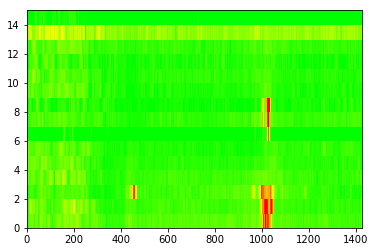

In [42]:
# plt.plot(test_speed_y[0,:,:1])  #12-19-2016 Monday 6:30AM - 8:30AM
# plt.pcolor(test_speed_y[0,:,:].transpose(),cmap=my_cmap, vmin=20, vmax=70)  #12-19-2016 Monday 6:30AM - 8:30AM

In [43]:
batch_size = train_speed_x.shape[1]

todaySequence = Input(shape=(look_back, train_speed_x1.shape[3]),name='todaySequence')
h1=LSTM(32, input_shape=(look_back, train_speed_x1.shape[3]), stateful=False, return_sequences=True)(todaySequence)
h1=LSTM(32, input_shape=(look_back, train_speed_x1.shape[3]), stateful=False)(h1)

historySequence = Input(shape=(look_back_days, train_speed_x2.shape[3]),name='historySequence')
h2=LSTM(32, input_shape=(look_back, train_speed_x2.shape[3]), stateful=False, return_sequences=True)(historySequence)
h2=LSTM(32, input_shape=(look_back, train_speed_x2.shape[3]), stateful=False)(h2)

h3 = keras.layers.concatenate([h1, h2])
predictedSpeed = Dense(train_speed_y.shape[2],name='predictedSpeed')(h3)

model = Model(inputs=[todaySequence, historySequence], outputs=[predictedSpeed])

model.compile(loss='mean_squared_error', optimizer='adam')

# model.compile(optimizer='rmsprop',
#               loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
#               loss_weights={'main_output': 1., 'aux_output': 0.2})

train_x1 = np.reshape(train_speed_x1,(train_speed_x1.shape[0]*train_speed_x1.shape[1],train_speed_x1.shape[2],train_speed_x1.shape[3]))
train_x2 = np.reshape(train_speed_x2,(train_speed_x2.shape[0]*train_speed_x2.shape[1],train_speed_x2.shape[2],train_speed_x2.shape[3]))
train_y = np.reshape(train_speed_y,(train_speed_y.shape[0]*train_speed_y.shape[1],train_speed_y.shape[2]))

history = model.fit({'todaySequence': train_x1, 'historySequence': train_x2},
          {'predictedSpeed': train_y},
          epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

# model.load_weights('images/weights/exp9.hdf5', by_name=True)
model.save_weights('images/weights/exp9.hdf5')

/Users/Shuo/anaconda2/envs/CarND/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/1
428925/428925 [==============================] - 110s - loss: 2960.1167   


In [48]:
history_plot_multi_historyAsSecondInput(history,'images/history_exp3.png','images/test1_exp9.png','images/test1_heatmap_exp9.png',scoreflag=True,look_ahead = 1400,start = 0,test_case=1)
history_plot_multi_historyAsSecondInput(history,'images/history_exp3.png','images/test2_exp9.png','images/test2_heatmap_exp9.png',scoreflag=False,look_ahead = 1400,start = 0,test_case=2)
history_plot_multi_historyAsSecondInput(history,'images/history_exp3.png','images/test3_exp9.png','images/test3_heatmap_exp9.png',scoreflag=False,look_ahead = 1400,start = 0,test_case=3)

### Experiment10: input: multivariate speed; output: multivariate delta speed; lookback = 15

In [49]:
train_speed0,train_speed_y0,_,mean0,_ = get_certain_dayofweek(Speed,0,data_train)
train_speed1,train_speed_y1,_,_,_ = get_certain_dayofweek(Speed,1,data_train)
train_speed2,train_speed_y2,_,_,_ = get_certain_dayofweek(Speed,2,data_train)
train_speed3,train_speed_y3,_,_,_ = get_certain_dayofweek(Speed,3,data_train)
train_speed4,train_speed_y4,_,mean4,_ = get_certain_dayofweek(Speed,4,data_train)
train_speed5,train_speed_y5,_,_,_ = get_certain_dayofweek(Speed,5,data_train)
train_speed6,train_speed_y6,_,_,_ = get_certain_dayofweek(Speed,6,data_train)

test_speed = Speed[data_test.index,:,:]
test_speed_y0 = np.concatenate((test_speed[0:1]-mean4,test_speed[1:2]-mean0,test_speed[2:3]-mean4),axis=0)

print('train_speed0.shape = ',train_speed0.shape)
print('test_speed.shape = ',test_speed.shape)

train_speed0.shape =  (48, 1440, 15)
test_speed.shape =  (3, 1440, 15)


In [50]:
look_back = 15
mode = 'multi'

test_speed_x,test_speed_y = create_dataset(test_speed,test_speed_y0, look_back, mode)

train_speed_x,train_speed_y = create_dataset(train_speed0,train_speed_y0, look_back, mode)
train_speed_x10,train_speed_y0 = create_dataset(train_speed1,train_speed_y1, look_back,mode)
train_speed_x = np.concatenate((train_speed_x,train_speed_x10),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_y0 = create_dataset(train_speed2,train_speed_y2, look_back,mode)
train_speed_x = np.concatenate((train_speed_x,train_speed_x10),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_y0 = create_dataset(train_speed3,train_speed_y3, look_back,mode)
train_speed_x = np.concatenate((train_speed_x,train_speed_x10),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_y0 = create_dataset(train_speed4,train_speed_y4, look_back,mode)
train_speed_x = np.concatenate((train_speed_x,train_speed_x10),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_y0 = create_dataset(train_speed5,train_speed_y5, look_back,mode)
train_speed_x = np.concatenate((train_speed_x,train_speed_x10),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_y0 = create_dataset(train_speed6,train_speed_y6, look_back,mode)
train_speed_x = np.concatenate((train_speed_x,train_speed_x10),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)

print('look_back = ',look_back)
print('look_back_days = ',look_back_days)
print('mode = ',mode)
print('train_speed_x.shape = ',train_speed_x.shape)
print('train_speed_y.shape = ',train_speed_y.shape)
print('test_speed_x.shape = ',test_speed_x.shape)
print('test_speed_y.shape = ',test_speed_y.shape)

mean0=mean0[look_back:,:]
mean4=mean4[look_back:,:]

look_back =  15
look_back_days =  6
mode =  multi
train_speed_x.shape =  (343, 1425, 15, 15)
train_speed_y.shape =  (343, 1425, 15)
test_speed_x.shape =  (3, 1425, 15, 15)
test_speed_y.shape =  (3, 1425, 15)


In [57]:
# plt.plot(test_speed_y[0,:,:1]+mean4[:,:1])  #12-19-2016 Monday 6:30AM - 8:30AM
# plt.pcolor(mean0[:,:].transpose(),cmap=my_cmap, vmin=20, vmax=70)  #12-19-2016 Monday 6:30AM - 8:30AM
# plt.pcolor(test_speed_y[0,:,:].transpose()+mean4[:,:].transpose(),cmap=my_cmap, vmin=20, vmax=70)  #12-19-2016 Monday 6:30AM - 8:30AM

In [58]:
batch_size = train_speed_x.shape[1]

model = Sequential()
model.add(LSTM(32, input_shape=(look_back, train_speed_x.shape[3]), stateful=False, return_sequences=True))
# model.add(Dropout(0.3))
model.add(LSTM(32, input_shape=(look_back, train_speed_x.shape[3]), stateful=False))
# model.add(Dropout(0.3))
model.add(Dense(train_speed_y.shape[2]))
model.compile(loss='mean_squared_error', optimizer='adam')

train_x = np.reshape(train_speed_x,(train_speed_x.shape[0]*train_speed_x.shape[1],train_speed_x.shape[2],train_speed_x.shape[3]))
train_y = np.reshape(train_speed_y,(train_speed_y.shape[0]*train_speed_y.shape[1],train_speed_y.shape[2]))
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
# model.load_weights('images/weights/exp10.hdf5', by_name=True)
model.save_weights('images/weights/exp10.hdf5')

/Users/Shuo/anaconda2/envs/CarND/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/1
488775/488775 [==============================] - 115s - loss: 9.7542   


In [61]:
history_plot_multi(history,'images/history_exp10.png','images/test1_exp10.png','images/test1_heatmap_exp10.png',a=mean4,b=mean4,scoreflag=True,look_ahead = 1400,start = 0,test_case=1)
history_plot_multi(history,'images/history_exp10_delta.png','images/test1_exp10_delta.png','images/test1_heatmap_exp10_delta.png',b=mean4,scoreflag=False,look_ahead = 1400,start = 0,test_case=1)

history_plot_multi(history,'images/history_exp10.png','images/test2_exp10.png','images/test2_heatmap_exp10.png',a=mean0,b=mean0,scoreflag=False,look_ahead = 1400,start = 0,test_case=2)
history_plot_multi(history,'images/history_exp10_delta.png','images/test2_exp10_delta.png','images/test2_heatmap_exp10_delta.png',b=mean0,scoreflag=False,look_ahead = 1400,start = 0,test_case=2)

history_plot_multi(history,'images/history_exp10.png','images/test3_exp10.png','images/test3_heatmap_exp10.png',a=mean4,b=mean4,scoreflag=False,look_ahead = 1400,start = 0,test_case=3)
history_plot_multi(history,'images/history_exp10_delta.png','images/test3_exp10_delta.png','images/test3_heatmap_exp10_delta.png',b=mean4,scoreflag=False,look_ahead = 1400,start = 0,test_case=3)

### Experiment12: input: multivariate speed; output: multivariate delta speed; lookback = 15; lookback weeks = 6 (parallel structure)

In [62]:
train_speed0,train_speed_y0,_,mean0,_ = get_certain_dayofweek(Speed,0)
train_speed1,train_speed_y1,_,_,_ = get_certain_dayofweek(Speed,1)
train_speed2,train_speed_y2,_,_,_ = get_certain_dayofweek(Speed,2)
train_speed3,train_speed_y3,_,_,_ = get_certain_dayofweek(Speed,3)
train_speed4,train_speed_y4,_,mean4,_ = get_certain_dayofweek(Speed,4)
train_speed5,train_speed_y5,_,_,_ = get_certain_dayofweek(Speed,5)
train_speed6,train_speed_y6,_,_,_ = get_certain_dayofweek(Speed,6)

test_speed = Speed[data_test.index,:,:]
test_speed_y0 = np.concatenate((test_speed[0:1]-mean4,test_speed[1:2]-mean0,test_speed[2:3]-mean4),axis=0)

print('train_speed0.shape = ',train_speed0.shape)
print('test_speed.shape = ',test_speed.shape)

train_speed0.shape =  (49, 1440, 15)
test_speed.shape =  (3, 1440, 15)


In [63]:
index1=list(data.index[data['dayofweek'] == 4]).index(data_test.index[data_test['dayofweek'] == 4][0])
index2=list(data.index[data['dayofweek'] == 0]).index(data_test.index[data_test['dayofweek'] == 0][0])
index3=list(data.index[data['dayofweek'] == 4]).index(data_test.index[data_test['dayofweek'] == 4][1])
print('index1={}  index2={}  index3={} '.format(index1,index2,index3))

index1=45  index2=45  index3=47 


In [64]:
look_back = 15
look_back_days = 6
mode = 'multi'
train_speed_x1,train_speed_x2,train_speed_y = create_dataset_historyAsSecondInput(train_speed0,train_speed_y0, look_back, look_back_days, mode)
test_speed_x1_2 = train_speed_x1[index2-look_back_days:index1-look_back_days+1,:,:,:]
test_speed_x2_2 = train_speed_x2[index2-look_back_days:index1-look_back_days+1,:,:,:]
test_speed_y_2 = train_speed_y[index2-look_back_days:index1-look_back_days+1,:,:]
train_speed_x1 = train_speed_x1[list(range(index2-look_back_days))+list(range(index2-look_back_days+1,len(train_speed_x1))),:,:,:]
train_speed_x2 = train_speed_x2[list(range(index2-look_back_days))+list(range(index2-look_back_days+1,len(train_speed_x2))),:,:,:]
train_speed_y = train_speed_y[list(range(index2-look_back_days))+list(range(index2-look_back_days+1,len(train_speed_y))),:,:]

train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed1,train_speed_y1, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed2,train_speed_y2, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed3,train_speed_y3, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)

train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed4,train_speed_y4, look_back, look_back_days, mode)
test_speed_x1_13 = train_speed_x10[[index1-look_back_days,index3-look_back_days],:,:,:]
test_speed_x2_13 = train_speed_x20[[index1-look_back_days,index3-look_back_days],:,:,:]
test_speed_y_13 = train_speed_y0[[index1-look_back_days,index3-look_back_days],:,:]
train_speed_x10 = train_speed_x10[list(range(index1-look_back_days))+list(range(index1-look_back_days+1,index3-look_back_days))+list(range(index3-look_back_days+1,len(train_speed_x10))),:,:,:]
train_speed_x20 = train_speed_x20[list(range(index1-look_back_days))+list(range(index1-look_back_days+1,index3-look_back_days))+list(range(index3-look_back_days+1,len(train_speed_x20))),:,:,:]
train_speed_y0 = train_speed_y0[list(range(index1-look_back_days))+list(range(index1-look_back_days+1,index3-look_back_days))+list(range(index3-look_back_days+1,len(train_speed_y0))),:,:]

train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed5,train_speed_y5, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)
train_speed_x10,train_speed_x20,train_speed_y0 = create_dataset_historyAsSecondInput(train_speed6,train_speed_y6, look_back, look_back_days, mode)
train_speed_x1 = np.concatenate((train_speed_x1,train_speed_x10),axis=0)
train_speed_x2 = np.concatenate((train_speed_x2,train_speed_x20),axis=0)
train_speed_y = np.concatenate((train_speed_y,train_speed_y0),axis=0)

test_speed_x1 = np.concatenate((test_speed_x1_13[0:1],test_speed_x1_2,test_speed_x1_13[-1:]),axis=0)
test_speed_x2 = np.concatenate((test_speed_x2_13[0:1],test_speed_x2_2,test_speed_x2_13[-1:]),axis=0)                                                                          
test_speed_y = np.concatenate((test_speed_y_13[0:1],test_speed_y_2,test_speed_y_13[-1:]),axis=0)  
                                                                        
print('look_back = ',look_back)
print('look_back_days = ',look_back_days)
print('mode = ',mode)
print('train_speed_x1.shape = ',train_speed_x1.shape)
print('train_speed_x2.shape = ',train_speed_x2.shape)
print('train_speed_y.shape = ',train_speed_y.shape)
print('test_speed_x1.shape = ',test_speed_x1.shape)
print('test_speed_x2.shape = ',test_speed_x2.shape)
print('test_speed_y.shape = ',test_speed_y.shape)

mean0=mean0[look_back:,:]
mean4=mean4[look_back:,:]

look_back =  15
look_back_days =  6
mode =  multi
train_speed_x1.shape =  (301, 1425, 15, 15)
train_speed_x2.shape =  (301, 1425, 6, 15)
train_speed_y.shape =  (301, 1425, 15)
test_speed_x1.shape =  (3, 1425, 15, 15)
test_speed_x2.shape =  (3, 1425, 6, 15)
test_speed_y.shape =  (3, 1425, 15)


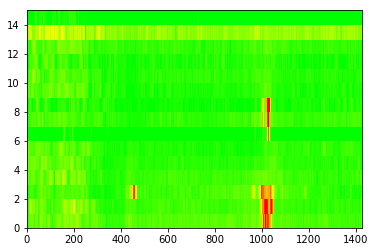

In [68]:
# plt.plot(test_speed_y[0,:,:1]+mean4[:,:1])  #12-19-2016 Monday 6:30AM - 8:30AM
# plt.pcolor(mean0[:,:].transpose(),cmap=my_cmap, vmin=20, vmax=70)  #12-19-2016 Monday 6:30AM - 8:30AM
# plt.pcolor(test_speed_y[0,:,:].transpose()+mean4[:,:].transpose(),cmap=my_cmap, vmin=20, vmax=70)  #12-19-2016 Monday 6:30AM - 8:30AM

In [69]:

batch_size = train_speed_x.shape[1]

todaySequence = Input(shape=(look_back, train_speed_x1.shape[3]),name='todaySequence')
h1=LSTM(32, input_shape=(look_back, train_speed_x1.shape[3]), stateful=False, return_sequences=True)(todaySequence)

h1=LSTM(32, input_shape=(look_back, train_speed_x1.shape[3]), stateful=False,name='h1')(todaySequence)

historySequence = Input(shape=(look_back_days, train_speed_x2.shape[3]),name='historySequence')
h2=LSTM(32, input_shape=(look_back, train_speed_x2.shape[3]), stateful=False, return_sequences=True)(historySequence)
h2=LSTM(32, input_shape=(look_back, train_speed_x2.shape[3]), stateful=False,name='h2')(h2)

h3 = keras.layers.concatenate([h1, h2],name='h3')
# h3 = keras.layers.concatenate([h1, h2],name='h3')

predictedSpeed = Dense(train_speed_y.shape[2],name='predictedSpeed')(h3)

model = Model(inputs=[todaySequence, historySequence], outputs=[predictedSpeed])

model.compile(loss='mean_squared_error', optimizer='adam')

# model.compile(optimizer='rmsprop',
#               loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
#               loss_weights={'main_output': 1., 'aux_output': 0.2})

train_x1 = np.reshape(train_speed_x1,(train_speed_x1.shape[0]*train_speed_x1.shape[1],train_speed_x1.shape[2],train_speed_x1.shape[3]))
train_x2 = np.reshape(train_speed_x2,(train_speed_x2.shape[0]*train_speed_x2.shape[1],train_speed_x2.shape[2],train_speed_x2.shape[3]))
train_y = np.reshape(train_speed_y,(train_speed_y.shape[0]*train_speed_y.shape[1],train_speed_y.shape[2]))

history = model.fit({'todaySequence': train_x1, 'historySequence': train_x2},
          {'predictedSpeed': train_y},
          epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

# model.load_weights('images/weights/exp12.hdf5', by_name=True)
model.save_weights('images/weights/exp12.hdf5')

/Users/Shuo/anaconda2/envs/CarND/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/1
428925/428925 [==============================] - 64s - loss: 9.5245    


In [ ]:
history_plot_multi_historyAsSecondInput(history,'images/history_exp12.png','images/test1_exp12.png','images/test1_heatmap_exp12.png',a=mean4,b=mean4,scoreflag=True,look_ahead = 1400,start = 0,test_case=1)
history_plot_multi_historyAsSecondInput(history,'images/history_exp12_delta.png','images/test1_exp12_delta.png','images/test1_heatmap_exp12_delta.png',b=mean4,scoreflag=False,look_ahead = 1400,start = 0,test_case=1)

history_plot_multi_historyAsSecondInput(history,'images/history_exp12.png','images/test2_exp12.png','images/test2_heatmap_exp12.png',a=mean0,b=mean0,scoreflag=False,look_ahead = 1400,start = 0,test_case=2)
history_plot_multi_historyAsSecondInput(history,'images/history_exp12_delta.png','images/test2_exp12_delta.png','images/test2_heatmap_exp12_delta.png',b=mean0,scoreflag=False,look_ahead = 1400,start = 0,test_case=2)

history_plot_multi_historyAsSecondInput(history,'images/history_exp12.png','images/test3_exp12.png','images/test3_heatmap_exp12.png',a=mean4,b=mean4,scoreflag=False,look_ahead = 1400,start = 0,test_case=3)
history_plot_multi_historyAsSecondInput(history,'images/history_exp12_delta.png','images/test3_exp12_delta.png','images/test3_heatmap_exp12_delta.png',b=mean4,scoreflag=False,look_ahead = 1400,start = 0,test_case=3)